# 개요

`1` 파인애플 보험사의 효괴적인 마케팅 전략을 완성시키기 위한 데이터 기반 마케팅 솔루션 제안

`2`  고객별로 특징을 적절하게 반영할 수 있는 군집분석을 통해<font color = "blue"> 고객 segment 개발</font>

# 1. 데이터 로드

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook_connected"
import os
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

In [4]:
data = pd.read_csv('customers_seg.csv', encoding = "CP949")
data.head()

,CID,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,...,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
0,1,3,피보험자,무직,1,2.616381,0,기본,대학졸업,0,...,미혼,80,0,1,자주방문,없음,자사영업,631000,일반세단,소
1,2,1,계약자,고용,0,6.352530,0,기본,고졸이하,102887400,...,미혼,80,1,4이상,비방문,포인트,인터넷,54000,일반세단,중
2,3,2,계약자,휴직,0,4.974354,0,기본,대학졸업,22159500,...,기혼,60,0,4이상,비방문,할인,자사영업,362000,일반세단,중
3,4,5,계약자,고용,1,13.480284,0,고급,고졸이하,51562500,...,기혼,110,0,2,비방문,할인,자사영업,1264000,컴팩트카,대
4,5,4,계약자,고용,0,9.776436,0,기본,석사,26820200,...,기혼,120,0,3,비방문,없음,대리점,947000,SUV,중


`-` 인덱스 설정

In [5]:
data.set_index("CID", inplace = True)
data.head()

,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,지역,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
CID,,,,,,,,,,,,,,,,,,,,
1,3,피보험자,무직,1,2.616381,0,기본,대학졸업,0,도시근교,미혼,80,0,1,자주방문,없음,자사영업,631000,일반세단,소
2,1,계약자,고용,0,6.352530,0,기본,고졸이하,102887400,시골,미혼,80,1,4이상,비방문,포인트,인터넷,54000,일반세단,중
3,2,계약자,휴직,0,4.974354,0,기본,대학졸업,22159500,도시근교,기혼,60,0,4이상,비방문,할인,자사영업,362000,일반세단,중
4,5,계약자,고용,1,13.480284,0,고급,고졸이하,51562500,도시근교,기혼,110,0,2,비방문,할인,자사영업,1264000,컴팩트카,대
5,4,계약자,고용,0,9.776436,0,기본,석사,26820200,도시근교,기혼,120,0,3,비방문,없음,대리점,947000,SUV,중


# 2. 데이터 기초 정보 확인

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12000 entries, 1 to 12000
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AGE                      12000 non-null  int64  
 1   등록(계/피)                  12000 non-null  object 
 2   고용상태                     12000 non-null  object 
 3   성별                       12000 non-null  int64  
 4   Willingness to pay/Stay  12000 non-null  float64
 5   갱신                       12000 non-null  int64  
 6   상품타입                     12000 non-null  object 
 7   교육수준                     12000 non-null  object 
 8   소득                       12000 non-null  int64  
 9   지역                       12000 non-null  object 
 10  결혼여부                     12000 non-null  object 
 11  월 납입액                    12000 non-null  int64  
 12  VOC                      12000 non-null  int64  
 13  타 상품 보유 현황               12000 non-null  object 
 14  온라인방문빈도                  12

`-` 수치형 데이터 기초통계 정보 확인

In [9]:
data.select_dtypes("number").describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,12000.0,3.079000e+00,1.121768e+00,1.00000,3.0000,3.000000e+00,4.000000e+00,6.000000e+00
성별,12000.0,4.875833e-01,4.998666e-01,0.00000,0.0000,0.000000e+00,1.000000e+00,1.000000e+00
Willingness to pay/Stay,12000.0,8.859478e+00,7.698885e+00,2.04573,4.3734,6.384831e+00,9.867900e+00,9.249630e+01
갱신,12000.0,1.430000e-01,3.500874e-01,0.00000,0.0000,0.000000e+00,0.000000e+00,1.000000e+00
소득,12000.0,4.641737e+07,3.736221e+07,0.00000,0.0000,4.186240e+07,7.664150e+07,1.320209e+08
월 납입액,12000.0,1.000658e+02,4.245375e+01,60.00000,70.0000,9.000000e+01,1.200000e+02,3.500000e+02
VOC,12000.0,3.901667e-01,9.196052e-01,0.00000,0.0000,0.000000e+00,0.000000e+00,5.000000e+00
총지불금액,12000.0,5.355854e+05,3.587993e+05,0.00000,336000.0000,4.740000e+05,6.790000e+05,3.573000e+06


# 3. 주요 변수 선정 및 탐색

`-` 주요 변수  <font color="1E90FF"><b>11개의 features를 선정</font>
    
<font color="1E90FF"><b> `-` 목표 : 군집화가 된 고객 segment 개발</font>
   
<span><b>1. 도메인 내 주요 정보 항목</span>
    <br>- (1) Willingness to pay/Stay: 계속 보험을 유지할 지 판단하는 지표 (신용점수, 납부/연체기록, 소득 등 활용)
    <br>- (2) 소득 
    <br>- (3) 월 납입액
    <br>- (4) 타상품 보유 현황: 고객이 이용하는 파인애플사의 타 서비스 수(어느정도 고객의 충성도를 알 수 있음)
    <br>- (5) 총지불금액
    
<span><b>2. 분석가 선정 컬럼</span>
    <br>- (6)AGE, (7)고용상태, (8)교육수준: 고객 기본 정보
    <br>- (9)상품타입, (10)거주지사이즈, (11)자동차: 소득 등과 연관해서 추정이 가능한 정보

# 4. 분석가 선정 컬럼 시각화

In [14]:
d_col = ["AGE","고용상태","교육수준","상품타입","거주지사이즈","자동차"]
df_list = []
for i in range(len(d_col)) :
    exec(f"p_table_{d_col[i]} = pd.crosstab(index=data[d_col[i]],columns = 'percentage',normalize=True)*100")
    exec(f"p_table_{d_col[i]}['var']={'d_col[i]'}")
    exec(f"p_table_{d_col[i]}.reset_index(inplace=True)")
    exec(f"p_table_{d_col[i]}.columns = ['label', 'percentage', 'var']")
    exec(f"df_list.append(p_table_{d_col[i]})")

In [16]:
total1 = pd.concat(df_list)

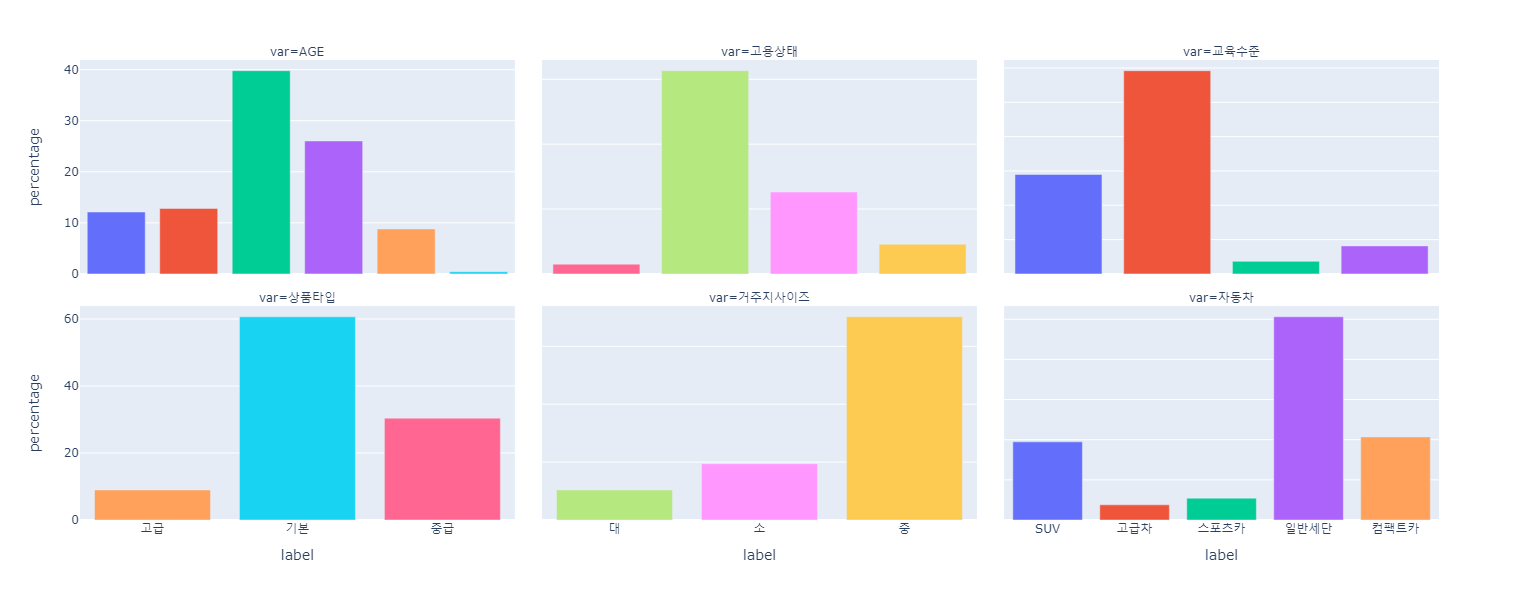

In [17]:
fig = total1.plot(x="label", y= "percentage", kind ="bar",
            backend = "plotly",color = "label",facet_col = "var",
            facet_col_wrap = 3, height = 600)

fig.update_xaxes(matches = None)
fig.update_yaxes(matches = None)
fig.update_layout(showlegend=False)

## insight

1. 분석가 선정 컬럼을 탐색해본 결과 대부분의 고객들은 중산층에 속해있는 것 같다.

2. 분석가 선정 컬럼들에 따른 고객 소득 분포의 차이가 유의미하다면 고객 세그먼트와, 데이터 드리븐 전략을 세워 마케팅에 활용할 수 있다.

# 5. 도메인 주요항목 중 수치형 변수 시각화

In [19]:
#[문제 21] 도메인 내 주요 항목 컬럼들이 수치형인지 문자형인지 알아보자! (info 활용)
col2 = ["Willingness to pay/Stay","소득","월 납입액","타 상품 보유 현황","총지불금액"]
data[col2].info()

<class 'pandas.core.frame.DataFrame'>
Index: 12000 entries, 1 to 12000
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Willingness to pay/Stay  12000 non-null  float64
 1   소득                       12000 non-null  int64  
 2   월 납입액                    12000 non-null  int64  
 3   타 상품 보유 현황               12000 non-null  object 
 4   총지불금액                    12000 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 562.5+ KB


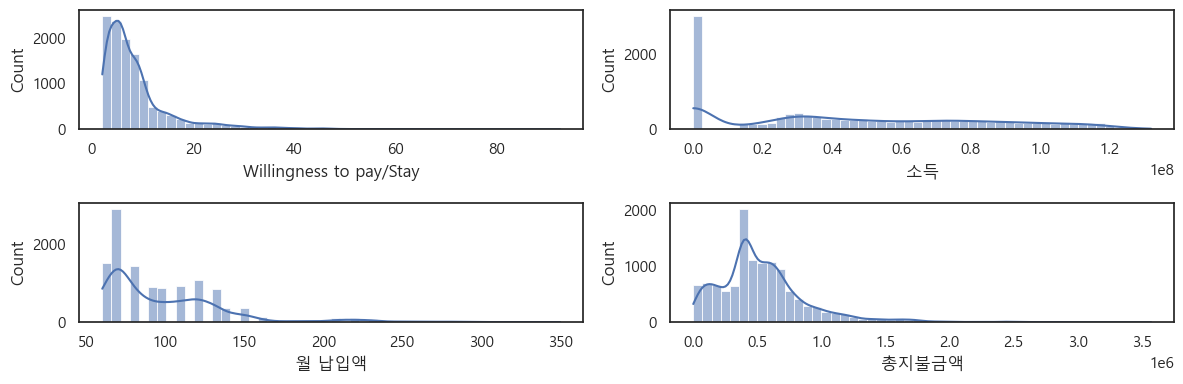

In [20]:
data2 = data[col2].select_dtypes("number")
l = data2.columns.values

fig,axes = plt.subplots(2,2, figsize = (12,4))

(ax0,ax1), (ax2, ax3) = axes

for i in range(4) :
    exec(f"sns.histplot(x={'l[i]'}, data=data2,bins=50, ax=ax{i},kde=True)")

fig.tight_layout()

## insight

1. 도메인 주용 항목 중 수치형 변수의 분포가 소득을 제외하고 왼쪽으로 치우쳐져 있다.

2. 소득의 경우 무직, 휴직, False 상태인 고객이 50%정도 차지 하고 있기 때문에 `count = 0` 부근에서 가장 많은 빈도를 보인다.

# 6. 타상품 보유 현황 확인

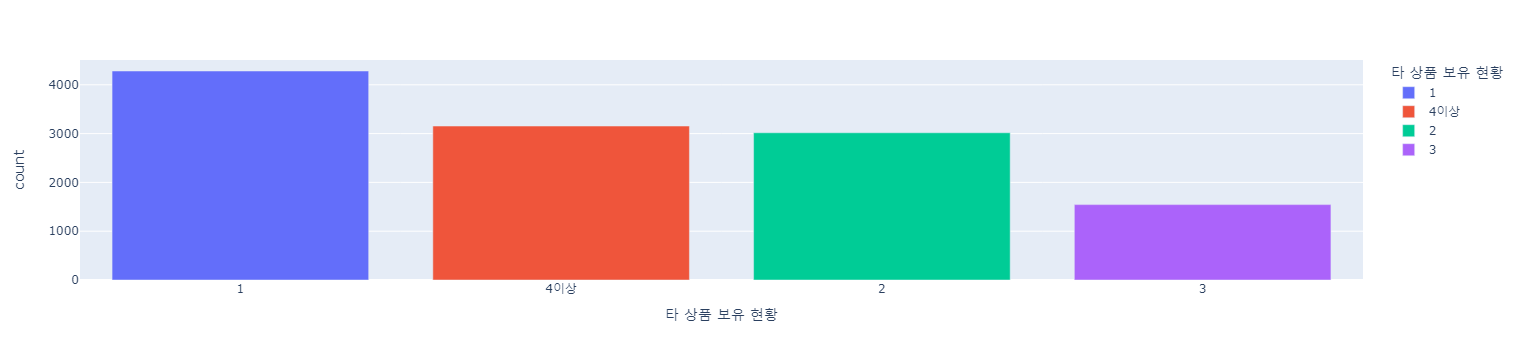

In [21]:
t = data[["타 상품 보유 현황"]].value_counts().reset_index()
t.plot(x = "타 상품 보유 현황", y = "count",
      kind = "bar", backend = "plotly",color = "타 상품 보유 현황", width = 500)

## insight

1. 현재 타 삼품 보유현황은 1, 4이상, 2, 3 순으로 많다.

2. 상품간 연계되는 서비스를 제공한다면 4이상을 1순위로 올릴 수 있다.